In [14]:
import bilby
import matplotlib.pyplot as plt
import numpy as np
from bilby.core.utils import random
from bilby.core.prior import PriorDict, DeltaFunction

from scipy.signal import get_window
from scipy.fft import fft, fftfreq

random.seed(123)

In [ ]:
#Exercise 1: Sinusoid 

# Setup
outdir_ex1 = "outdir_ex3"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex1)
label_ex1 = "multiple_damped_sinusoidal_FFT"

sampling_frequency_ex1 = 256
time_duration_ex1 = 3

time_ex1 = np.arange(0, time_duration_ex1, 1/sampling_frequency_ex1) 
freq_ex1 = fftfreq(len(time_ex1), 1/sampling_frequency_ex1)

injection_parameters_ex1 = dict(
    A_1=1e-22,  
    f_1=150.0,  
    off_1=1.0,

    A_2=5e-23,
    f_2=175.0,
    off_2=1.1,

    geocent_time=0,
    ra=1.375,
    dec=-1.2108,
    psi=2.659
)

def model_ex1(time, A_1, f_1, off_1, A_2, f_2, off_2, **kwargs):
        N = len(time)
        sinusoid_1 = (A_1 / (time + off_1))*np.sin(2*np.pi*f_1*(time + off_1))
        sinusoid_2 = (A_2 / (time + off_2))*np.sin(2*np.pi*f_2*(time + off_2))
        sinusoid = sinusoid_1 + sinusoid_2
        window = get_window('hann', N)
        return dict (plus=sinusoid*window, cross=sinusoid*window) 
        # return sinusoid*window

waveform_generator = bilby.gw.WaveformGenerator(
    duration=time_duration_ex1,
    sampling_frequency=sampling_frequency_ex1,
    time_domain_source_model=model_ex1,
    start_time=0,
)

# ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos = bilby.gw.detector.InterferometerList(["CE", "H1", "ET"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency_ex1,
    duration=time_duration_ex1,
    start_time=0,
    
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters_ex1, raise_error=False
)

10:34 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=3, sampling_frequency=256, start_time=0, frequency_domain_source_model=None, time_domain_source_model=__main__.model_ex1, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, waveform_arguments={})
10:34 bilby INFO    : Generation of mass parameters failed with message 'mass_1'
10:34 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
10:34 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
10:34 bilby INFO    : Injected signal in CE:
10:34 bilby INFO    :   optimal SNR = 171.35
10:34 bilby INFO    :   matched filter SNR = 169.73+0.65j
10:34 bilby INFO    :   A_1 = 1e-22
10:34 bilby INFO    :   f_1 = 150.0
10:34 bilby INFO    :   off_1 = 1.0
10:34 bilby INFO    :   A_2 = 5e-23
10:34 bilby INFO    :   f_2 = 175.0
10:34 bilby INFO    :   off_2 = 1.1
10:34 bilby INFO    :   geocent_time = 0
10:34 bilby INFO 

[{'plus': array([-1.38087355e-31+0.00000000e+00j, -1.38114854e-31+2.81862023e-35j,
         -1.38198560e-31+5.60525277e-35j, -1.38337634e-31+8.47046118e-35j,
         -1.38532476e-31+1.12177688e-34j, -1.38784201e-31+1.41388647e-34j,
         -1.39090691e-31+1.69076330e-34j, -1.39453483e-31+1.98302744e-34j,
         -1.39874322e-31+2.26226682e-34j, -1.40351139e-31+2.55633724e-34j,
         -1.40884945e-31+2.84441698e-34j, -1.41477044e-31+3.13692233e-34j,
         -1.42126558e-31+3.43398952e-34j, -1.42834886e-31+3.72809059e-34j,
         -1.43602050e-31+4.03078901e-34j, -1.44428812e-31+4.33224973e-34j,
         -1.45315761e-31+4.63943151e-34j, -1.46263190e-31+4.95088934e-34j,
         -1.47272293e-31+5.26162476e-34j, -1.48343647e-31+5.58189399e-34j,
         -1.49477509e-31+5.90222557e-34j, -1.50675579e-31+6.22778587e-34j,
         -1.51937809e-31+6.56034573e-34j, -1.53265854e-31+6.89448519e-34j,
         -1.54660278e-31+7.23657158e-34j, -1.56122102e-31+7.58317413e-34j,
         -1.57652

In [31]:
ifos.plot_data()

In [17]:
# priors = bilby.gw.prior.BBHPriorDict(injection_parameters_ex1.copy())

priors = dict()
priors['A_1'] = bilby.core.prior.Uniform(0.5e-22, 1.5e-22, 'A_1')
priors['f_1'] = bilby.core.prior.Uniform(140.0, 160.0, 'f_1')
priors['off_1'] = bilby.core.prior.Uniform(0.75, 1.25, 'off_1')

priors['A_2'] = bilby.core.prior.Uniform(1e-23, 1e-22, 'A_2')
priors['f_2'] = bilby.core.prior.Uniform(165.0, 185.0, 'f_2')
priors['off_2'] = bilby.core.prior.Uniform(0.75, 1.25, 'off_2')

# Fixed parameters
priors['geocent_time'] = DeltaFunction(0.0, 'geocent_time')
priors['ra'] = DeltaFunction(1.375, 'ra')
priors['dec'] = DeltaFunction(-1.2108, 'dec')
priors['psi'] = DeltaFunction(2.659, 'psi')


likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sample="rwalk",
    npoints=200,
    injection_parameters=injection_parameters_ex1,
    outdir=outdir_ex1,
    label=label_ex1,
    boostrap=0,
    clean=True
)

00:00 bilby INFO    : Running for label 'multiple_damped_sinusoidal_FFT', output will be saved to 'outdir_ex3'
00:00 bilby INFO    : Using lal version 7.7.0
00:00 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.7.0;Id: ef36dfdf49181b9b376a867b55a14463783de545;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
00:00 bilby INFO    : Using lalsimulation version 6.2.0
00:00 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v6.2.0;Id: 1338470a6165fb4b4c98bccdd0efe961f05bc8e0;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
00:00 bilby INFO    : Analysis priors:
00:00 bilby INFO    : A_1=Uniform(minimum=5e-23, maximum=1.5e-22, name='A_1', latex_label='A_1', unit=None, boundary=None)
00:00 bilby INFO    : f_1=Uniform(minimum=140.0, maximum=160.0, name='f_1', latex_label='f_1', unit=None, boundary=None)
00:00 bilby INFO    : off_1=Uniform(minimum=0.75, 

1it [00:00, ?it/s]

00:02 bilby INFO    : Written checkpoint file outdir_ex3/multiple_damped_sinusoidal_FFT_resume.pickle
00:02 bilby INFO    : Rejection sampling nested samples to obtain 980 posterior samples
00:02 bilby INFO    : Sampling time: 0:01:26.202588
00:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
00:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
00:02 bilby INFO    : Summary of results:
nsamples: 980
ln_noise_evidence: -362.918
ln_evidence: -349.329 +/-  0.250
ln_bayes_factor: 13.588 +/-  0.250



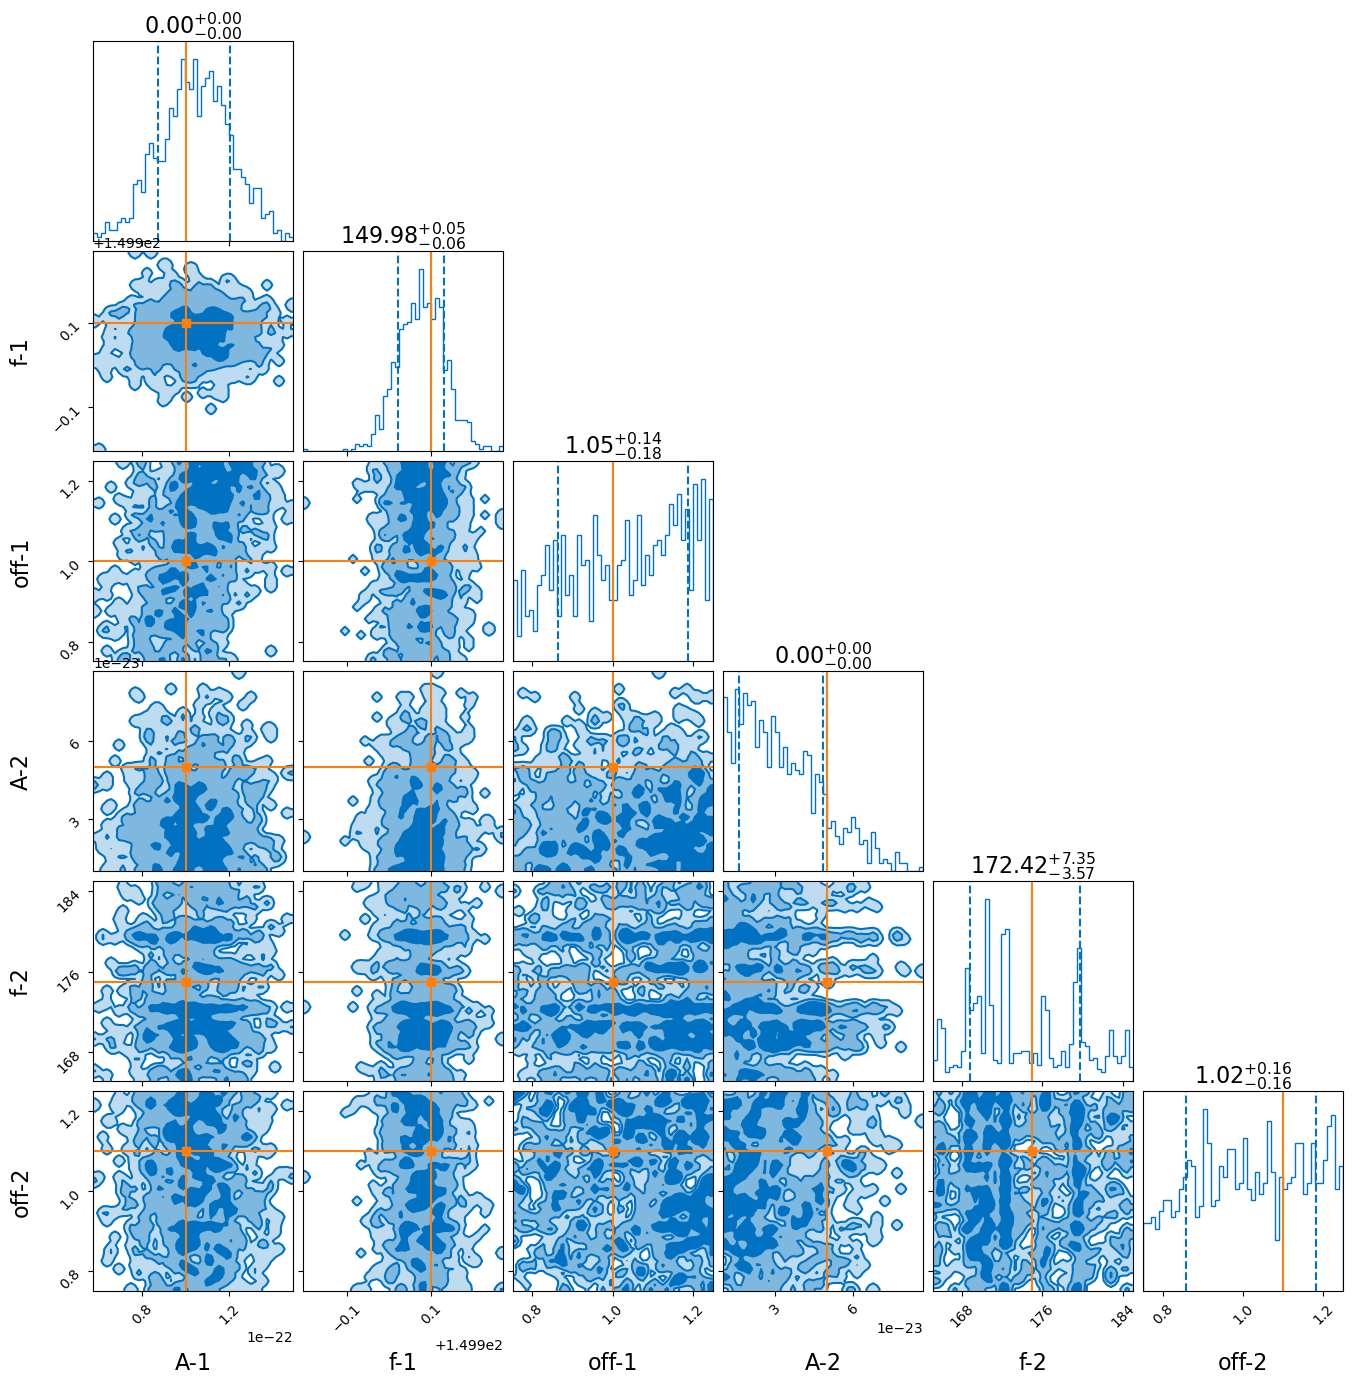

In [18]:
result.plot_corner(save=False)
plt.show()
plt.close()

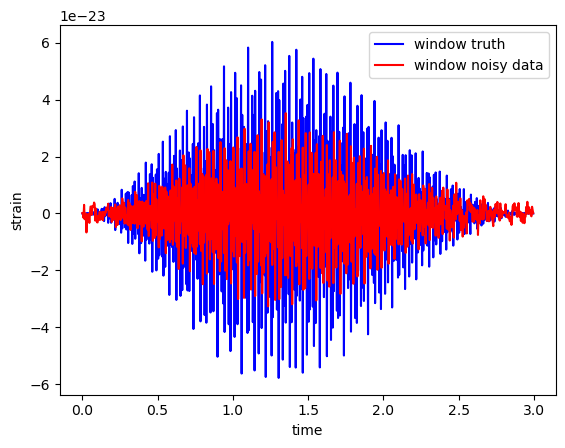

In [26]:
fig, ax = plt.subplots()

ax.plot(time_ex1, waveform_generator.time_domain_strain(injection_parameters_ex1)['plus'], "b", label="window truth")
ax.plot(time_ex1, ifos[0].time_domain_strain, "r", label="window noisy data")


ax.set_xlabel("time")
ax.set_ylabel("strain")
ax.legend()

/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


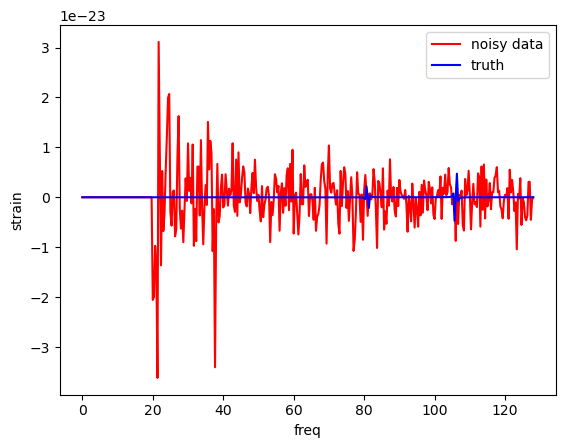

In [20]:
fig, ax = plt.subplots()

ax.plot(ifos[0].frequency_array, ifos[0].frequency_domain_strain, "r", label="noisy data")
ax.plot(ifos[0].frequency_array, waveform_generator.frequency_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.set_xlabel("freq")
ax.set_ylabel("strain")
# ax.set_yscale("log")
# ax.set_xlim(100, 120)
ax.legend()

00:02 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=3, sampling_frequency=256, start_time=0, frequency_domain_source_model=None, time_domain_source_model=__main__.model_ex1_nowindow, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, waveform_arguments={})
00:02 bilby INFO    : Generation of mass parameters failed with message 'mass_1'
00:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
00:02 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
00:02 bilby INFO    : Injected signal in H1:
00:02 bilby INFO    :   optimal SNR = 13.55
00:02 bilby INFO    :   matched filter SNR = 13.35-1.20j
00:02 bilby INFO    :   A_1 = 1e-22
00:02 bilby INFO    :   f_1 = 150.0
00:02 bilby INFO    :   off_1 = 1.0
00:02 bilby INFO    :   A_2 = 5e-23
00:02 bilby INFO    :   f_2 = 175.0
00:02 bilby INFO    :   off_2 = 1.1
00:02 bilby INFO    :   geocent_time = 0
00:02 bilb

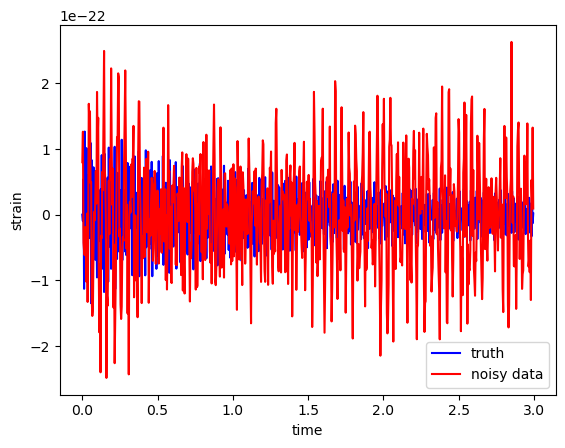

In [21]:
def model_ex1_nowindow(time, A_1, f_1, off_1, A_2, f_2, off_2, **kwargs):
        N = len(time)
        sinusoid_1 = (A_1 / (time + off_1))*np.sin(2*np.pi*f_1*(time + off_1))
        sinusoid_2 = (A_2 / (time + off_2))*np.sin(2*np.pi*f_2*(time + off_2))
        sinusoid = sinusoid_1 + sinusoid_2

        return dict (plus=sinusoid, cross=sinusoid) 
        # return sinusoid*window

waveform_generator_nw = bilby.gw.WaveformGenerator(
    duration=time_duration_ex1,
    sampling_frequency=sampling_frequency_ex1,
    time_domain_source_model=model_ex1_nowindow,
    start_time=0,
)

ifos_nw = bilby.gw.detector.InterferometerList(["H1"])
ifos_nw.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency_ex1,
    duration=time_duration_ex1,
    start_time=0,
    
)
ifos_nw.inject_signal(
    waveform_generator=waveform_generator_nw, parameters=injection_parameters_ex1, raise_error=False
)

fig, ax = plt.subplots()

ax.plot(time_ex1, waveform_generator_nw.time_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.plot(time_ex1, ifos_nw[0].time_domain_strain, "r", label="noisy data")


ax.set_xlabel("time")
ax.set_ylabel("strain")
ax.legend()